# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard


In [23]:
import yfinance as yf
import requests
import pandas as pd
from bs4 import BeautifulSoup

## Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [5]:
# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract stock information and save it in a dataframe
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

In [4]:
# Display the first five rows of the dataframe
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [ ]:
# URL containing Tesla's revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Headers to mimic a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Send an HTTP request to the URL with the headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all tables in the web page
    tables = soup.find_all('table')
    
    # The correct table is the one with "Tesla Annual Revenue" data
    for table in tables:
        if 'Tesla Annual Revenue' in str(table):
            df = pd.read_html(str(table))[0]
            break
    
    # Display the last five rows of the dataframe
    #print(df.tail(5))
else:
    print("Failed to retrieve the webpage:", response.status_code)

In [12]:
# Display the last five rows of the dataframe
df.tail(5)

,Tesla Annual Revenue (Millions of US $),Tesla Annual Revenue (Millions of US $).1
10,2013,"$2,013"
11,2012,$413
12,2011,$204
13,2010,$117
14,2009,$112


## Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [14]:
# Fetch historical data for GME
gme_data = yf.download('GME', start='2020-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [15]:
gme_data.reset_index(inplace=True)

In [17]:
gme_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1.5350,1.6175,1.5175,1.5775,1.5775,17814400
1,2020-01-03,1.5525,1.5625,1.4600,1.4700,1.4700,14175600
2,2020-01-06,1.4500,1.4775,1.4000,1.4625,1.4625,13579200
3,2020-01-07,1.4425,1.4575,1.3600,1.3800,1.3800,20912000
4,2020-01-08,1.3725,1.4625,1.3525,1.4300,1.4300,22517600


## Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [ ]:
# URL containing GME's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Headers to mimic a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Send an HTTP request to the URL with the headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all tables in the web page
    tables = soup.find_all('table')
    
    # The correct table is the one with "GameStop Annual Revenue" data
    for table in tables:
        if 'GameStop Annual Revenue' in str(table):
            df = pd.read_html(str(table))[0]
            break
    
    # Display the last five rows of the dataframe
    #print(df.tail(5))
else:
    print("Failed to retrieve the webpage:", response.status_code)

In [19]:
df.tail(5)

,GameStop Annual Revenue (Millions of US $),GameStop Annual Revenue (Millions of US $).1
11,2013,"$8,887"
12,2012,"$9,551"
13,2011,"$9,474"
14,2010,"$9,078"
15,2009,"$8,806"


## Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

[*********************100%***********************]  1 of 1 completed


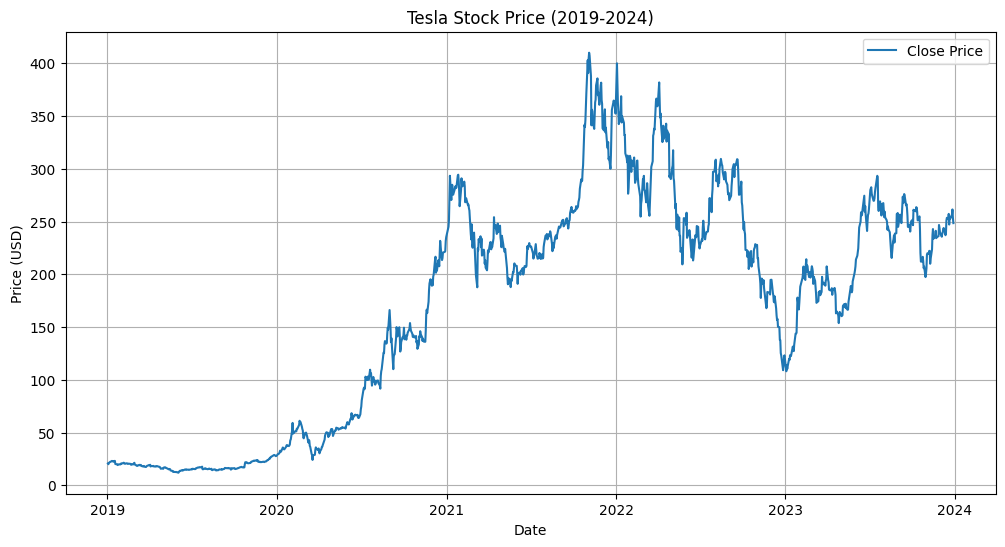

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download historical data for Tesla
tesla_data = yf.download('TSLA', start='2019-01-01', end='2024-01-01')

def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph for Tesla stock data
make_graph(tesla_data, 'Tesla Stock Price (2019-2024)')

## Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

[*********************100%***********************]  1 of 1 completed


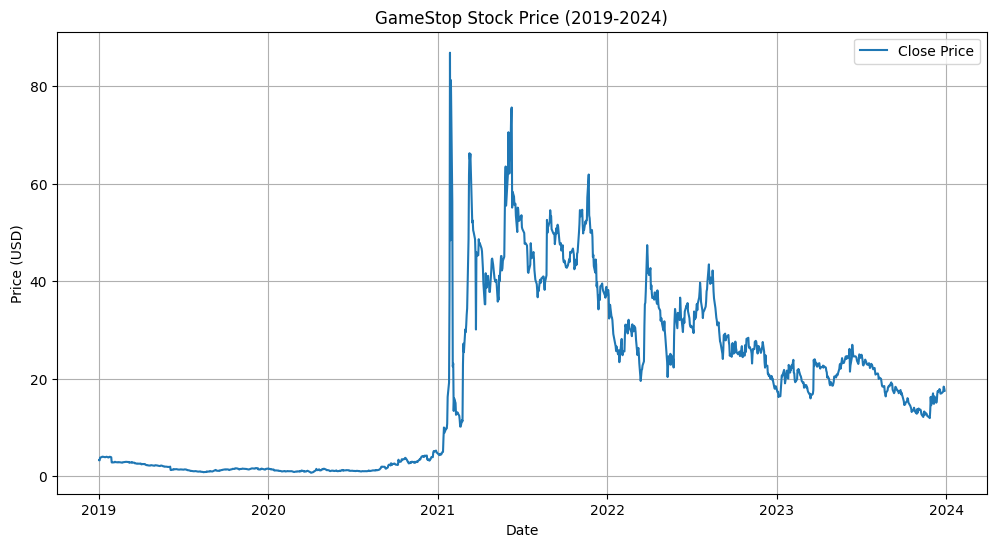

In [22]:
# Download historical data for GameStop
gme_data = yf.download('GME', start='2019-01-01', end='2024-01-01')

def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'], label='Close Price')  # Plot the closing price
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph for GameStop stock data
make_graph(gme_data, 'GameStop Stock Price (2019-2024)')